In [12]:
%run Functions.py
import Functions # Import Loss_function and Gradient_function

In [26]:
# Matrix Y, containing all possilbe edges
Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

In [27]:
mu = np.zeros(2) # Define mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0], [0, 2.0]]) # Define covariance matrix
num_samples = 4  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points

In [28]:
n = 50 # Number of iterations
graf = np.zeros(n)
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
            
    graf[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function


Text(0.5, 0, 'Iterration')

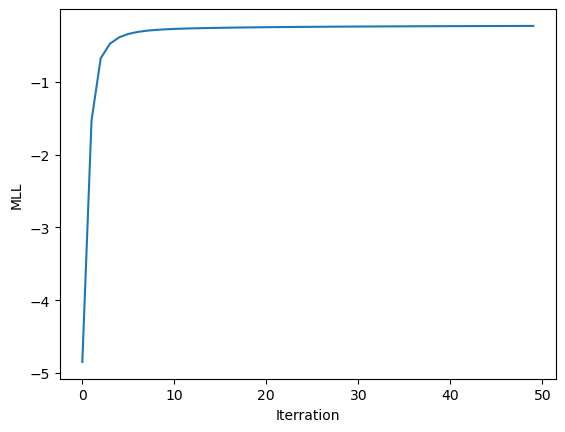

In [29]:
plt.plot(graf)
plt.ylabel('MLL')
plt.xlabel('Iterration')

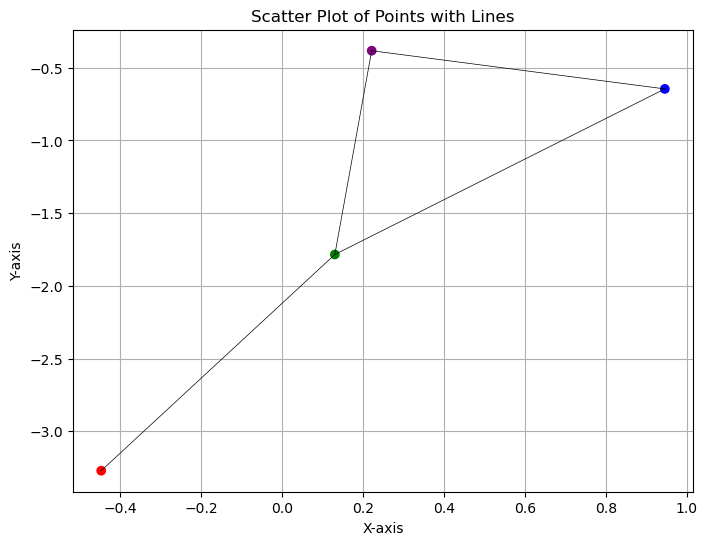

In [30]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y, color=['red', 'green', 'blue', 'purple'])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Lines')
plt.grid(True)
plt.show()

In [ ]:
# Plot without lines
# extract the points and plot them
x = [points[i+1][0] for i in range(num_samples)]
y = [points[i+1][1] for i in range(num_samples)]

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Points')
plt.grid(True)
plt.show()